# 🍚 Risotto
> Research Intelligent Support and Organization TOol against COVID-19 

![Python 3.x](https://img.shields.io/badge/python-3.x-green.svg)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Inria-Chile/risotto)
![CI](https://github.com/Inria-Chile/risotto/workflows/CI/badge.svg)
[![Inria](https://img.shields.io/badge/Made%20in-Inria-%23e63312)](http://inria.cl)
![Fighting against COVID-19](https://img.shields.io/badge/fighting-%F0%9F%A6%A0_COVID--19-9cf)
[![License: CeCILLv2.1](https://img.shields.io/badge/license-CeCILL--v2.1-orange)](https://cecill.info/licences.en.html)

## About Risotto

The research effort prompted by [COVID-19](https://en.wikipedia.org/wiki/Coronavirus_disease_2019) is generating a massive amount of results. These results are mainly reported as research papers. These papers are being disseminated academic journals and conferences, and open-access pre-prints repositories like [medRxiv](https://www.medrxiv.org/), [arXiv](https://arxiv.org), [bioRxiv](https://www.biorxiv.org/), etc. In parallel, many publishing houses have opened access to their publication catalogs with current and previous publications related to coronaviruses.

The [Allen Institute for AI](https://allenai.org/) and other collaborating institutions have consolidated the different sources of openly available research papers in the [COVID-19 Open Research Dataset (CORD-19)](https://www.semanticscholar.org/cord19) [1]. From March 2020 to June 2020 CORD-19 has grown from about 28 000 papers to more than 150 000, thus multiplying the number of papers more than five times, as can be appreciated in the subsequent figure.

In [1]:
# hide
import datetime
import requests
import pandas as pd

from bs4 import BeautifulSoup
from dateutil.parser import parse

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
%config InlineBackend.figure_format = 'svg'

In [4]:
# hide
def plot_cord19_papers():
    '''
    Downloads CORD-19 changelog and parses the dates and number of papers.
    '''
    def is_date(string, fuzzy=False):
        try:
            parse(string, fuzzy=fuzzy)
            return True
        except ValueError:
            return False

    cord_19_url = 'https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html'

    soup = BeautifulSoup(requests.get(cord_19_url).text, 'html.parser')
    recent_changelog_url = sorted([
        tag['href'] for tag in soup.find_all('a') if tag.text == 'changelog'
    ])[-1]

    changelog_text = requests.get(recent_changelog_url).text

    df = pd.DataFrame()

    saw_date = False

    for line in changelog_text.splitlines():
        if not saw_date:
            if is_date(line.strip()):
                date = line
                saw_date = True
        elif line.startswith('total metadata rows:'):
            num_of_papers = int(line.split()[-1])
            df = df.append(
                {
                    'Release date': date,
                    'Number of papers': num_of_papers
                },
                ignore_index=True)
            saw_date = False

    # the first one is not the changelog
    df = df.append({
        'Release date': '2020-03-13',
        'Number of papers': 28064
    },
                   ignore_index=True)

    df['Release date'] = pd.to_datetime(df['Release date'])

    factor = df['Number of papers'].max() / df['Number of papers'].min()

    df.plot(
        x='Release date',
        y='Number of papers',
        subplots=True,
        legend=False,
        ylim=[0, 1.05 * df['Number of papers'].max()],
        linewidth=2,
        markersize=6,
        style=':',
        figsize=(8, 3),
        marker='o',
        markeredgecolor='navy',
        title='The %.1fx fold increase of the number of papers in CORD-19 as of ' % factor +
        datetime.date.today().strftime(f'%Y-%b-%d.'),
        markerfacecolor=None)

    plt.gca().annotate(int(df['Number of papers'].min()),
                       xy=(df['Release date'].min(),
                           df['Number of papers'].min()),
                       xycoords='data',
                       xytext=(0, 45),
                       textcoords='offset points',
                       bbox=dict(boxstyle="round4,pad=.5",
                                 color='black',
                                 fc="0.92"),
                       arrowprops=dict(color='black', arrowstyle='->'),
                       horizontalalignment='center',
                       verticalalignment='bottom')

    plt.gca().annotate(int(df['Number of papers'].max()),
                       xy=(df['Release date'].max(),
                           df['Number of papers'].max()),
                       xycoords='data',
                       xytext=(0, -45),
                       textcoords='offset points',
                       bbox=dict(boxstyle="round4,pad=.5",
                                 color='black',
                                 fc="0.92"),
                       arrowprops=dict(color='black', arrowstyle='->'),
                       horizontalalignment='center',
                       verticalalignment='top')

    plt.ylabel('Number of papers')
    plt.legend(['CORD-19 releases'])
    plt.savefig('cord-progress.pdf', bbox_inches = "tight")

/var/folders/rd/zx5pjw6d7dscr0_269x2gfj40000gn/T/ipykernel_40261/1936651342.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
/var/folders/rd/zx5pjw6d7dscr0_269x2gfj40000gn/T/ipykernel_40261/1936651342.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
/var/folders/rd/zx5pjw6d7dscr0_269x2gfj40000gn/T/ipykernel_40261/1936651342.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
/var/folders/rd/zx5pjw6d7dscr0_269x2gfj40000gn/T/ipykernel_40261/1936651342.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
/var/folders/rd/zx5pjw6d7dscr0_269x2gfj40000gn/T/ipykernel_40261

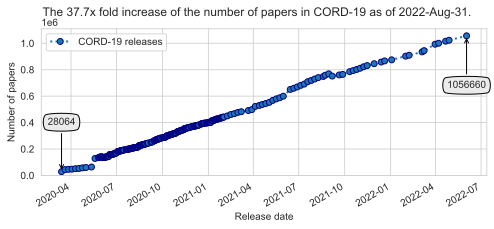

In [5]:
plot_cord19_papers()

Understanding and making the most out of this massive compendium and effort brings different challenges. For instance: 
- how to make determine what are the research topics? 
- what are the key reference papers and
- which ones present novel groundbreaking ideas worthy of attention?

This task is further complicated as many papers are being disseminated as non-peer-reviewed preprints and thus not assessed or sifted through before publication.

Traditional human-curated, ontology-based, or supervised (human tag-based) learning natural language processing (NLP) methods are not able to handle the task of supporting research and understanding results adequately.

So far, to the best of our knowledge, there is not a research support tool that exploits the current state of the art of unsupervised learning in NLP that could be used to provide a quick response to this problem.

Risotto is a research support tool that applies state of the art unsupervised, NLP and ML methods to:

- analyze COVID-19-related research papers freely available online,
- automatically detect hierarchical groups of these papers and topics applying the lastest topic modeling tools,
- automatically rank leading or reference papers based on a relevance ranking approach,
- discover potential breakthroughs and new results that are worthy of further investigation, and
- provide a visualization tool to understand how is the progress doing what areas are receiving more attention in time, etc.

Risotto is being actively developed. You can try it and/or contribute. It is expected that, as we progress on the conception and development of this tool new tasks/tools will be added to this list.

**Web:** https://risotto.inria.cl

**Github repo:** https://github.com/Inria-Chile/risotto


### References

1. Wang, L.L., Lo, K., Chandrasekhar, Y., Reas, R., Yang, J., Eide, D., Funk, K., Kinney, R.M., Liu, Z., Merrill, W., Mooney, P., Murdick, D.A., Rishi, D., Sheehan, J., Shen, Z., Stilson, B., Wade, A.D., Wang, K., Wilhelm, C., Xie, B., Raymond, D.M., Weld, D.S., Etzioni, O., & Kohlmeier, S. (2020). CORD-19: The Covid-19 Open Research Dataset. *ArXiv, [abs/2004.10706.](https://arxiv.org/pdf/2004.10706.pdf)*

## Installing Risotto

### Prerequisites

In order to use Risotto you will need a [Kaggle](https://www.kaggle.com) username and key.

### Get a Kaggle API key

If you do not have a Kaggle api key, you may follow the instructions here: https://www.kaggle.com/docs/api. You can set your API key by either:

- Copying the `kaggle.json` file in your local system, in `~/.kaggle/kaggle.json` for Linux/Mac or `C:\Users<Windows-username>.kaggle\kaggle.json` for Windows.
- Setting the `KAGGLE_USERNAME` and `KAGGLE_KEY` environment variables by one of the following options:

```bash
# Temporarily (you will need to do this everytime you open a new terminal):
export $KAGGLE_USERNAME=<your_username>
export $KAGGLE_KEY=<your_key>
```

```bash
# For bash
echo 'export KAGGLE_USERNAME=<your_username>' >> ~/.bash_profile
echo 'export KAGGLE_KEY=<your_key>' >> ~/.bash_profile
```

```bash
# For zsh
echo 'export KAGGLE_USERNAME=<your_username>' >> ~/.zshenv
echo 'export KAGGLE_KEY=<your_key>' >> ~/.zshenv
```

- Setting the `KAGGLE_USERNAME` and `KAGGLE_KEY` environment variables in a `.env` file (for Docker use only!)

```bash
touch .env
echo 'KAGGLE_USERNAME=<your_username>' >> .env
echo 'KAGGLE_KEY=<your_key>' >> .env
```

### Clone or download the repository

```bash
git clone git@github.com:Inria-Chile/risotto.git
cd risotto
```

## How to use Risotto locally (without docker)

### Build virtual environment with Python 3.x and install requirements

```bash
python -m virtualenv -p python3 venv
source venv/bin/activate
pip install -r requirements.txt
```

### Run the build and preprocess scripts

The build script converts the Jupyter notebooks to python scripts. The `preprocess.py` script downloads the dataset and builds the artifacts if it is necessary, the `-f` flag forces to re-download and re-build.

```bash
source venv/bin/activate # If you have not sourced the virtual environment already
python scripts/build.py
python scripts/preprocess.py -f # Use the -f flag to override dataset and artifact ts if they exist
```

### Run the GUI

The GUI will be available at localhost:8000

```bash
source venv/bin/activate # If you have not sourced the virtual environment already
voila --port=8000 --no-browser --enable_nbextensions=True 06_GUI.ipynb
```

## How to use Risotto with docker

We provide 2 sets of docker files to serve 2 different purposes: development and production

### Docker for development

This option mounts the whole repository inside the docker container, in order to facilitate using changes in the code

```bash
docker-compose -f docker-compose-dev.yml build
docker-compose -f docker-compose-dev.yml up -d

# To restart the container:
docker-compose -f docker-compose-dev.yml restart risotto
docker-compose -f docker-compose-dev.yml up -d

# To force update the dataset and artifacts:
docker-compose -f docker-compose-dev.yml exec risotto python scripts/preprocess.py -f

# To stop the container:
docker-compose -f docker-compose-dev.yml down -v
```

### Docker for production

This option only mounts the dataset and artifacts folders, in order to keep them out of the container

```bash
docker-compose build
docker-compose up -d

# To restart the container:
docker-compose restart risotto
docker-compose up -d

# To force update the dataset and artifacts:
docker-compose exec risotto python scripts/preprocess.py -f

# To stop the container:
docker-compose down -v
```

```bash
docker-compose build
docker-compose up -d
# To stop the container:
docker-compose down -v
```

## How to contribute

### How to get started?

Before anything else, please install the `nbdev` git hooks that run automatic scripts during each commit and merge to strip the notebooks of superfluous metadata (and avoid merge conflicts). After cloning the repository, run the following command inside it:

```bash
nbdev_install_git_hooks
```

### Did you find a bug?

- Ensure the bug was not already reported by searching on GitHub under Issues.
- If you're unable to find an open issue addressing the problem, open a new one. Be sure to include a title and clear description, as much relevant information as possible, and a code sample or an executable test case demonstrating the expected behavior that is not occurring.
- Be sure to add the complete error messages.

### Did you write a patch that fixes a bug?

- Open a new GitHub pull request with the patch.
- Ensure that your PR includes a test that fails without your patch, and pass with it.
- Ensure the PR description clearly describes the problem and solution. Include the relevant issue number if applicable.


### PR submission guidelines

- Keep each PR focused. While it's more convenient, do not combine several unrelated fixes together. Create as many branches as needing to keep each PR focused.
- Do not mix style changes/fixes with "functional" changes. It's very difficult to review such PRs and it most likely get rejected.
- Do not add/remove vertical whitespace. Preserve the original style of the file you edit as much as you can.
- Do not turn an already submitted PR into your development playground. If after you submitted PR, you discovered that more work is needed - close the PR, do the required work and then submit a new PR. Otherwise each of your commits requires attention from maintainers of the project.
- If, however, you submitted a PR and received a request for changes, you should proceed with commits inside that PR, so that the maintainer can see the incremental fixes and won't need to review the whole PR again. In the exception case where you realize it'll take many many commits to complete the requests, then it's probably best to close the PR, do the work and then submit it again. Use common sense where you'd choose one way over another.


### Do you want to contribute to the documentation?

- Docs are automatically created from the notebooks.

---